<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Angewandte Geophysik II: Kap 6: Magnetik
# Magnetfeldmodellierung
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets

In [2]:
# define profile
xmin  = -500.
xmax  = +500.
xstep = 101
x = np.linspace(xmin,xmax,xstep)

For the **magnetic induction** $\vec{B}$ [T], we define
$$
\vec{B} = \mu_0 \vec{H}
$$
with $\mu_0=4 \pi \times 10^{-7}$ Vs/A/m the **permeability of vacuum**, 
and $\vec{H}$ [A/m] the **magnetic field strength**.

For the **magnetisation** $\vec{M}$ [A/m] we define
$$
\vec{M} = \chi \vec{H}
$$
with $\chi$ [-] the **susceptibility**.

## Dipole

<img src=figures/sketch_dipole.jpg style=width:10cm>

$$
\begin{array}{rcl}
 B_z & = & \frac{\mu_0}{4\pi} M \pi R^2
           \left( \frac{z}{r_1^3} - \frac{z+L\sin\alpha}{r_2^3}\right) \\
 B_x & = & \frac{\mu_0}{4\pi} M \pi R^2
           \left( \frac{x}{r_1^3} - \frac{x+L\cos\alpha}{r_2^3}\right)
\end{array}
$$

In [3]:
def B_dipole(x,D=100.,R=40.,L=100.,alpha=90.,M=0.04):
    mu0 = 4.e-7*np.pi
    r1     = np.sqrt(x**2 + D**2)
    r2     = np.sqrt((x+L*np.cos(alpha*np.pi/180.))**2 + (D+L*np.sin(alpha*np.pi/180.))**2)
    # magnetic induction of dipole
    Bx = mu0 / 4. / np.pi * M * np.pi * R**2 * (x / r1**3 - (x+L*np.cos(alpha*np.pi/180.))/r2**3)
    Bz = mu0 / 4. / np.pi * M * np.pi * R**2 * (D / r1**3 - (D+L*np.sin(alpha*np.pi/180.))/r2**3)
    return Bx,Bz

In [4]:
def plot_dipole(f1=False,f2=False,f3=False,f4=False,f5=False):
    D = [100,100,100,100,100]
    R = [40,40,40,40,40]
    L = [100,100,100,100,100]
    alpha = [90,45,0,90,90]
    M = [0.04,0.04,0.04,0.02,0.08]
    
    fig,axs = plt.subplots(2,1,figsize=(12,8))
    axs[0].set_xlim([-500,500])
    axs[0].set_xticks([x for x in np.linspace(-400,400,9)])
    axs[0].set_xlabel('Profile [m]')
    axs[0].set_ylim([-1.5,2.5])
    axs[0].set_yticks([y for y in np.linspace(-1.0,2.0,5)])
    axs[0].set_ylabel('Bx,Bz [nT]')
    axs[0].plot(x,1.e9*B_dipole(x)[0],linewidth=1.0,linestyle='-',color='black',label='B$_x$ - dipole')
    axs[0].plot(x,1.e9*B_dipole(x)[1],linewidth=1.0,linestyle=':',color='black',label='B$_z$ - dipole')
    if (f1):
        axs[0].plot(x,1.e9*B_dipole(x,D=D[0],R=R[0],M=M[0],alpha=alpha[0])[0],linewidth=2.0,linestyle='-',color='black',
                    label='D='+str(D[0])+',R='+str(R[0])+',L='+str(L[0])+',M='+str(M[0])+',alpha='+str(alpha[0]))
        axs[0].plot(x,1.e9*B_dipole(x,D=D[0],R=R[0],M=M[0],alpha=alpha[0])[1],linewidth=2.0,linestyle=':',color='black')
    if (f2):
        axs[0].plot(x,1.e9*B_dipole(x,D=D[1],R=R[1],M=M[1],alpha=alpha[1])[0],linewidth=2.0,linestyle='-',color='red',
                    label='D='+str(D[1])+',R='+str(R[1])+',L='+str(L[1])+',M='+str(M[1])+',alpha='+str(alpha[1]))
        axs[0].plot(x,1.e9*B_dipole(x,D=D[1],R=R[1],M=M[1],alpha=alpha[1])[1],linewidth=2.0,linestyle=':',color='red')
    if (f3):
        axs[0].plot(x,1.e9*B_dipole(x,D=D[2],R=R[2],M=M[2],alpha=alpha[2])[0],linewidth=2.0,linestyle='-',color='orange',
                    label='D='+str(D[2])+',R='+str(R[2])+',L='+str(L[2])+',M='+str(M[2])+',alpha='+str(alpha[2]))
        axs[0].plot(x,1.e9*B_dipole(x,D=D[2],R=R[2],M=M[2],alpha=alpha[2])[1],linewidth=2.0,linestyle=':',color='orange')
    if (f4):
        axs[0].plot(x,1.e9*B_dipole(x,D=D[3],R=R[3],M=M[3],alpha=alpha[3])[0],linewidth=2.0,linestyle='-',color='green',
                    label='D='+str(D[3])+',R='+str(R[3])+',L='+str(L[3])+',M='+str(M[3])+',alpha='+str(alpha[3]))
        axs[0].plot(x,1.e9*B_dipole(x,D=D[3],R=R[3],M=M[3],alpha=alpha[3])[1],linewidth=2.0,linestyle=':',color='green')
    if (f5):
        axs[0].plot(x,1.e9*B_dipole(x,D=D[4],R=R[4],M=M[4],alpha=alpha[4])[0],linewidth=2.0,linestyle='-',color='blue',
                    label='D='+str(D[4])+',R='+str(R[4])+',L='+str(L[4])+',M='+str(M[4])+',alpha='+str(alpha[4]))
        axs[0].plot(x,1.e9*B_dipole(x,D=D[4],R=R[4],M=M[4],alpha=alpha[4])[1],linewidth=2.0,linestyle=':',color='blue')
    axs[0].legend()

    axs[1].set_xlim([-500,500])
    axs[1].set_xticks([x for x in np.linspace(-400,400,9)])
    #axs[1].set_xlabel('Profile [m]')
    axs[1].set_ylim([250,0])
    axs[1].set_yticks([y for y in np.linspace(0.,200.,5)])
    axs[1].set_ylabel('Depth [m]')
    D = 100.
    alpha = 90; L = 100; xa1=0; ya1 = D; xb1 = -L*np.cos(alpha*np.pi/180.); yb1 = D+L*np.sin(alpha*np.pi/180.)
    alpha = 45; L = 100; xa2=0; ya2 = D; xb2 = -L*np.cos(alpha*np.pi/180.); yb2 = D+L*np.sin(alpha*np.pi/180.)
    alpha =  0; L = 100; xa3=0; ya3 = D; xb3 = -L*np.cos(alpha*np.pi/180.); yb3 = D+L*np.sin(alpha*np.pi/180.)
    alpha = 90; L = 100; xa4=0; ya4 = D; xb4 = -L*np.cos(alpha*np.pi/180.); yb4 = D+L*np.sin(alpha*np.pi/180.)
    alpha = 90; L = 100; xa5=0; ya5 = D; xb5 = -L*np.cos(alpha*np.pi/180.); yb5 = D+L*np.sin(alpha*np.pi/180.)

    if (f1):
        axs[1].plot([xa1,xb1],[ya1,yb1],linewidth=5,linestyle='-',color='red')
    if (f2):
        axs[1].plot([xa2,xb2],[ya2,yb2],linewidth=5,linestyle='--',color='red')
    if (f3):
        axs[1].plot([xa3,xb3],[ya3,yb3],linewidth=5,linestyle=':',color='red')
    if (f4):
        axs[1].plot([xa4,xb4],[ya4,yb4],linewidth=5,linestyle='-',color='green')
    if (f5):
        axs[1].plot([xa5,xb5],[ya5,yb5],linewidth=5,linestyle='-',color='blue')

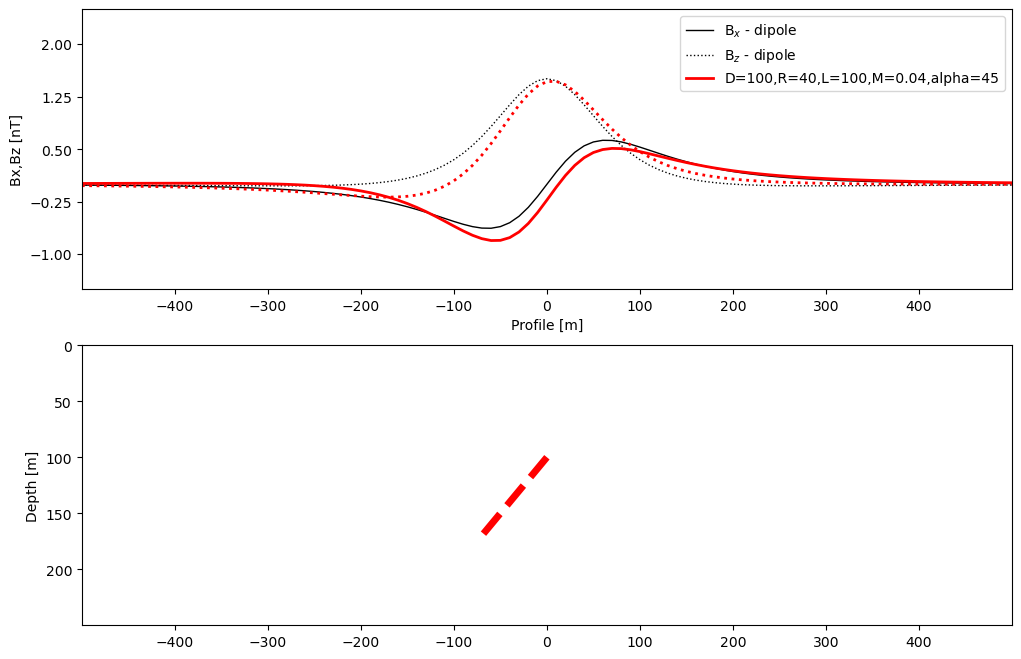

In [5]:
plot_dipole(f2=True)

In [6]:
# call interactive module
w = dict(
f1=widgets.Checkbox(value=True,description='eins',continuous_update=False,disabled=False),
#a1=widgets.FloatSlider(min=0.,max=2.,step=0.1,value=1.0),
f2=widgets.Checkbox(value=False,description='zwei',continuous_update=False,disabled=False),
f3=widgets.Checkbox(value=False,description='drei',continuous_update=False,disabled=False),
f4=widgets.Checkbox(value=False,description='vier',continuous_update=False,disabled=False),
f5=widgets.Checkbox(value=False,description='fuenf',continuous_update=False,disabled=False))
output = widgets.interactive_output(plot_dipole, w)
box = widgets.HBox([widgets.VBox([*w.values()]), output])
display(box)

... done